# Lab 3.4: Jointly Distributed Random Variables

## Outline
- Covariance
- Correlation 
- Independence
- Joint probability distribution
- Marginal probability distribution
- Conditional probability distribution

## Covariance

Covariance measures how much 2 random variables change together:
- **Covariance is positive when **
  - `random variable 1` has a high value when `random variable 2` has a high value
  - `random variable 1` has a low value when `random variable 2` has a low value

<br>

- **Covariance is negative when **
  - `random variable 1` has a low value when `random variable 2` has a high value, and vice versa

<br>

- **Covariance is 0 when **
  - `random variable 1` and `random variable 2` do not have any linear relationship


- Here is the case when covariance is positive

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
x1 = array([10, -10, 30, 50])
x2 = array([2.5, -3.4, 10, 2])

cov(x1, x2)

array([[ 666.66666667,   79.        ],
       [  79.        ,   30.33583333]])

By default, `numpy` returns a covariance matrix, and it has the following form

\begin{bmatrix}
    var(x1) & cov(x1, x2) \\
    cov(x1, x2) & var(x2)
\end{bmatrix}

So the covariance between `x1` and `x2` is 79

- Here is the case when covariance is negative

In [3]:
x1 = array([10, -10, 30, 50])
x2 = array([-2.5, 3.4, -10, -2])

# Calculate the covariance between x1 and x2
# Your code here
cov(x1,x2)

array([[ 666.66666667,  -79.        ],
       [ -79.        ,   30.33583333]])

- Here is the case when covariance is 0

In [4]:
x1 = array([-3, -2, -1, 0, 1, 2, 3])
x2 = array([9, 4, 1, 0, 1, 4, 9])

# Calculate the covariance between x1 and x2
# Your code here
cov(x1,x2)

array([[  4.66666667,   0.        ],
       [  0.        ,  14.        ]])

## Correlation

Correlation is convariance normalized by the standard deviations of the variables.

Therefore, the same rules of covariance apply to correlation, except correlation is bounded between -1 and 1.

Correlation provides a scaled measure of covariance so we can compare correlation across different datasets.

- Here is the case when correlation is positive

In [5]:
x1 = array([10, -10, 30, 50])
x2 = array([2.5, -3.4, 10, 2])

corrcoef(x1, x2)

array([[ 1.        ,  0.55551368],
       [ 0.55551368,  1.        ]])

Again `numpy` returns a correlation matrix, and it has the following form:

\begin{bmatrix}
    corr(x1, x1) & corr(x1, x2) \\
    corr(x2, x1) & corr(x2, x2)
\end{bmatrix}

The correlation of a variable with itself, i.e. $corr(x1, x1)$, is always 1.

- Here is the case when correlation is negative

In [5]:
x1 = array([10, -10, 30, 50])
x2 = array([-2.5, 3.4, -10, -2])

# Calculate the correlation between x1 and x2
# Your code here
corrcoef(x1,x2)

array([[ 1.        , -0.55551368],
       [-0.55551368,  1.        ]])

- Here is the case when correlation is zero / undefined

In [6]:
x1 = array([-3, -2, -1, 0, 1, 2, 3])
x2 = array([9, 4, 1, 0, 1, 4, 9])

# Calculate the correlation between x1 and x2
# Your code here
corrcoef(x1,x2)

array([[ 1.,  0.],
       [ 0.,  1.]])

## Independence


### Continuous Random Variables

If two random variables are correlated, then they are dependent.

**However if two random variables are not correlated, it does not mean they are independent.**

**Correlation describes linear dependencies between random variables, dependency can be described by other types of relationships**

- The example below demonstrates the idea

corr(x1, x2): 0.0


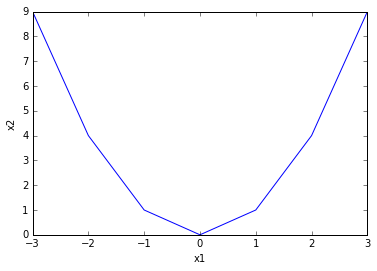

In [7]:
x1 = array([-3, -2, -1, 0, 1, 2, 3])
x2 = array([9, 4, 1, 0, 1, 4, 9])

print('corr(x1, x2):', corrcoef(x1, x2)[0,1])

plot(x1, x2)
xlabel('x1')
ylabel('x2');

$x_1$ and $x_2$ are clearly dependent, but since the relationship is perfectly quadratic, the correlation is 0.

### Discrete Random Variables


**Independence can be estalished by:**

$$p(x, y) = p(x) \times p(y)$$

Say we want to find out if being in Class A or Class B affects one chances of going to college and the data is given below.

|   | Success | Fail |
|---|---------|------|
| A | 20      | 34   |
| B | 15      | 12   |

In [9]:
total = ((20 + 34) + (15 + 12))
p_a = (20 + 34) / total
p_success = (20 + 15) / total
p_a_and_success = 20 / total
print('p(a) * p(success):', p_a * p_success)
print('p(a and success):', p_a_and_success)

p(a) * p(success): 0.28806584362139914
p(a and success): 0.24691358024691357


**Question**: Is getting into college independent of the two classes?

## Joint / marginal / conditional probability distribution

Joint / marginal / conditional distributions are useful for comparing **trends across different groups** in a dataset. 

Here we illustate how to use these techniques to conduct a **market segmentation analysis**.

- First we read in the data

In [3]:
import pandas as pd

pd.set_option('display.precision', 3)

sales_data = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/gender_product_segmentation.csv', 
                         index_col=0)
sales_data

,Product 1,Product 2,Product 3,Product 4
Male,321,857,404,766
Female,65,471,443,192


-  We get the sum of the rows and sum of the columns

In [9]:
col_sum = sales_data.sum(axis=0)
row_sum = sales_data.sum(axis=1)
total_sum = sum(row_sum)
# Write one line of code to compute the row sums here


print('----- Row sums ----')
print(row_sum)
print() 
print('----- Col sums -----')
print(col_sum)
print() 
print('----- Total sum ----')
print(total_sum)

----- Row sums ----
Male      2348
Female    1171
dtype: int64

----- Col sums -----
Product 1     386
Product 2    1328
Product 3     847
Product 4     958
dtype: int64

----- Total sum ----
3519


## Joint probabilities

- To compute the joint probability, we divide each cell by the `total_sum`

In [10]:
# Compute the joint probability and name is 'sales_joint'
# sales_joint should have the same dimension as the original data table

sales_joint = sales_data.apply(lambda x: (x/total_sum))

sales_joint

,Product 1,Product 2,Product 3,Product 4
Male,0.091,0.244,0.115,0.218
Female,0.018,0.134,0.126,0.055


- To be explicit, the joint probabilities are:

$$P(\text{Product 1} \cap \text{Male}) = 0.09$$
$$P(\text{Product 2} \cap \text{Male}) = 0.24$$
$$P(\text{Product 3} \cap \text{Male}) = 0.11$$
$$P(\text{Product 4} \cap \text{Male}) = 0.22$$


$$P(\text{Product 1} \cap \text{Female}) = 0.02$$
$$P(\text{Product 2} \cap \text{Female}) = 0.13$$
$$P(\text{Product 3} \cap \text{Female}) = 0.13$$
$$P(\text{Product 4} \cap \text{Female}) = 0.05$$

- Now let's visualize the joint probability distribution

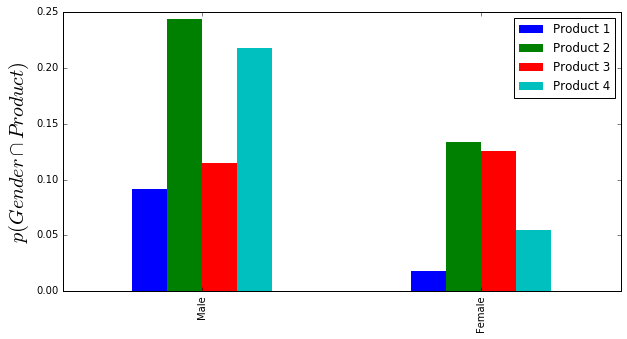

In [13]:
sales_joint.plot(kind='bar', edgecolor='None', figsize=(10, 5))
ylabel('$p(Gender \cap Product)$', fontsize=20);

Just by looking at the joint probability alone, it is tempting to conclude:
- Male buyers prefer **Product 2, 4**
- Female buyers prefer **Product 2, 3**

Let's also look at the marginal probabilities as well.

##Marginal Probabilities

A marginal probability is the sum of joint probabilities over the category of interest.

Say we are interested in gender, the marginal probabilities here would be (`row sum / total sum`)

In [11]:
# Compute and print the marginal probabilities for gender

male_row_sum = sales_joint[sales_joint.index=='Male'].sum(axis=1)
female_row_sum = sales_joint[sales_joint.index=='Female'].sum(axis=1)

print(male_row_sum)
print(female_row_sum)

Male    0.667
dtype: float64
Female    0.333
dtype: float64


There are twice as much male buyers compared to female buyers

Since we are dividing each cell with the total count when we are calculating joint probabilities, we are not taking into account the skewed distribution of buyers of different genders

**We need to take into account the fact that there are more male buyers**, and we turn to conditional probabilities for that.

## Conditional Probabilities

Conditional probability is computed by considering each group of interest individually.

We could look at female buyers as if there are no male buyers and only examine the female buyers' behavior. 

And the same applies to male buyers.

To compute a conditional probability, we divide the row by the row sum of that corresponding row.

In [12]:
male_sum = row_sum[0]
female_sum = row_sum[1]

sales_data_conditional = sales_data.copy()
sales_data_conditional.ix['Male'] = sales_data.ix['Male'] / male_sum
# Compute the conditional distribution of buyers' behavior for female buyers
sales_data_conditional.ix['Female'] = sales_data.ix['Female'] / female_sum

sales_data_conditional

,Product 1,Product 2,Product 3,Product 4
Male,0.137,0.365,0.172,0.326
Female,0.056,0.402,0.378,0.164


- Now let's visualize the conditional probability distribution

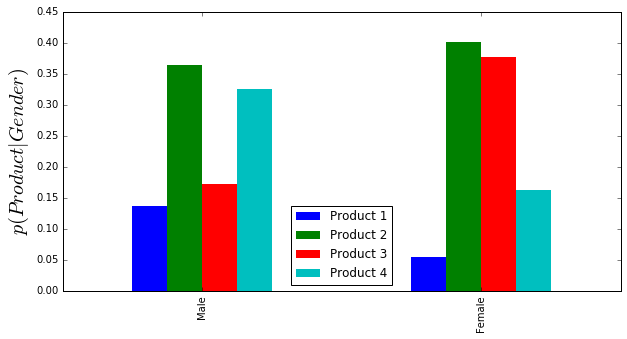

In [13]:
sales_data_conditional.plot(kind='bar', edgecolor='None', figsize=(10, 5))
ylabel('$p(Product | Gender)$', fontsize=20);

Now we are treating female and male buyers equally regardless of the number of buyer for each gender

We can conclude:
- Male buyers prefer **Product 2,4**
- Female buyers prefer **Product 2,3**

## Exercises

**Question 1**
- Read in the file https://s3-us-west-2.amazonaws.com/dsci/6002/data/admissions.csv and complete the following tasks:
   - Implement a function to calculate covariance (does not need to be in matrix form)
   - Implement a function to calcualte correlation (does not need to be in matrix form)
   - Identify the variable that is the most correlated with `gpa`

In [4]:
admissions = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/admissions.csv', 
                         index_col=0).reset_index()

In [5]:
admissions.loc[0]

family_income     31402.00
gpa                   3.18
parent_avg_age       32.00
Name: 0, dtype: float64

In [15]:
admissions.head()

,family_income,gpa,parent_avg_age
0,31402.0,3.18,32
1,32247.0,2.98,48
2,34732.0,2.85,61
3,53759.0,3.39,62
4,50952.0,3.10,45


In [16]:
def covariance(data,x,y):
    return cov(data[x], data[y])

In [17]:
"""Iterate through each combination of admission's column vectors to examine the covariance of each pair of variables."""
import itertools

admissions_columns = list(admissions.columns)
column_combos = list(itertools.combinations(admissions_columns,2)) #Use itertools to generate a list of tuples containing
                                                                    #all combinations of variables in the data set.
for combo in column_combos:
    print(combo)
    print(covariance(admissions,combo[0],combo[1]),"\n\n\n")
    
"""Covariance seems to be strongest between family_income and gpa."""

('family_income', 'gpa')
[[  3.32941046e+08   4.01529909e+03]
 [  4.01529909e+03   8.78911925e-02]] 



('family_income', 'parent_avg_age')
[[  3.32941046e+08  -1.22632628e+03]
 [ -1.22632628e+03   1.12977442e+02]] 



('gpa', 'parent_avg_age')
[[  8.78911925e-02  -2.87852599e-02]
 [ -2.87852599e-02   1.12977442e+02]] 





'Covariance seems to be strongest between family_income and gpa.'

In [18]:
"""Define correlation function that takes a Pandas DataFrame and two column indices: x and y, as input. Returns
correlation matrix."""

def correlation(data,x,y):
    return corrcoef(data[x], data[y])

In [19]:
"""Like the iteration above, print a correlation matrix for each combination of variables in the dataset."""

for combo in column_combos:
    print(combo)
    print(correlation(admissions,combo[0],combo[1]),"\n\n\n")
    
"""Family income has the strongest degree of correlation with GPA with a correlation value of 0.74
In other words, there is a strong positive relationship between family income and GPA."""

('family_income', 'gpa')
[[ 1.          0.74226939]
 [ 0.74226939  1.        ]] 



('family_income', 'parent_avg_age')
[[ 1.         -0.00632305]
 [-0.00632305  1.        ]] 



('gpa', 'parent_avg_age')
[[ 1.         -0.00913485]
 [-0.00913485  1.        ]] 





'Family income has the strongest degree of correlation with GPA with a correlation value of 0.74\nIn other words, there is a strong positive relationship between family income and GPA.'

**Question 2**
- Is `gpa` independent of the `family_income`? Why or why not?

In [20]:

"""By definition, two variables are independent of one another if they have a covariance of zero. """

assert covariance(admissions, 'gpa', 'family_income')[0][1] == 0

AssertionError: 

**Question 3**
- By categorizing the `gpa` into low/medium/high and `family_income` into `low/medium/high` (choose cut-off values that make sense to you), compute the conditional probability distributions and conduct analysis about how `family_income` affects `gpa`.

In [21]:

"""View summary statistics of each variable to inform our choice of cut-off values. Anthony had a 
little talk with Brian about 'binning' continuous variables into categories. He strongly advised 
against 'binning' continuous data into categories because you lower the fidelity of your 
information.

Both of us had some doubts about 'cooking our data' in such an unexact manner. Rather than 
assigning a label to a sample point by eyeballing the distribution (which we do below), 
a better method might be to use k-nearest-neighbors to produce more 'natural' cateogries/segments. 
We look forward to learning more about classification methods in the near future!
"""

print("GPA: \n", admissions.gpa.describe(),"\n\nFamily Income: \n", admissions.family_income.describe())

GPA: 
 count    10992.000
mean         2.998
std          0.296
min          2.010
25%          2.800
50%          2.990
75%          3.200
max          3.970
Name: gpa, dtype: float64 

Family Income: 
 count     10992.000
mean      40191.637
std       18246.672
min         168.000
25%       26832.750
50%       37510.000
75%       51112.250
max      125508.000
Name: family_income, dtype: float64


In [22]:
"""Credit to this Stack Overflow answer, which helped up use the pd.DataFram.apply method to apply
functions to all rows in a DataFrame."""

#http://stackoverflow.com/questions/27041724/using-conditional-to-generate-new-column-in-pandas-dataframe

'Credit to this Stack Overflow answer, which helped up use the pd.DataFram.apply method to apply\nfunctions to all rows in a DataFrame.'

In [23]:
"""Logic for deciding whether a student is low, middle, or high income. 

Student is low-income if family_income is less than the 25th percentile.
Student is medium-income if family_income is between the 25th and 75th percentiles.
Student is high-income if family_income is above the 75th percentile."""

def income_bracket(data):
    if data['family_income'] <= admissions.family_income.describe()[4]:
        return 'low income'
    elif data['family_income'] > admissions.family_income.describe()[4] and data['family_income'] <= admissions.family_income.describe()[6]:
        return 'medium income'
    else:
        return 'high income'

In [24]:
"""Logic for deciding whether a student is low, middle, or high GPA. 

Student is low-gpa if gpa is less than the 25th percentile.
Student is medium-gpa if gpa is between the 25th and 75th percentiles.
Student is high-gpa if gpa is above the 75th percentile."""

def gpa_bracket(data):
    if data['gpa'] <= admissions.gpa.describe()[4]:
        return 'low gpa'
    elif data['gpa'] > admissions.gpa.describe()[4] and data['gpa'] <= admissions.gpa.describe()[5]:
        return 'medium gpa'
    else:
        return 'high gpa'

In [27]:
"""Applies the gpa_bracket and income_bracket functions to each row in the dataset, effectively assigning low, medium,
or high to our new columns. This function is slow and takes a while, so please be patient."""
admissions['gpa_bracket'] = admissions.apply(gpa_bracket, axis=1)
admissions['income_bracket'] = admissions.apply(income_bracket,axis=1)

In [28]:
"""Checkt to see that apply worked... success!"""
admissions.head()

,family_income,gpa,parent_avg_age,gpa_bracket,income_bracket
0,31402.0,3.18,32,high gpa,medium income
1,32247.0,2.98,48,medium gpa,medium income
2,34732.0,2.85,61,medium gpa,medium income
3,53759.0,3.39,62,high gpa,high income
4,50952.0,3.10,45,high gpa,medium income


In [29]:

"""Use pd.crosstab to create a joint probability table of income and gpa brackets."""
n = len(admissions)

#Divides the count of each intersection by the total number of observations in the dataset.
admissions_crstb = pd.crosstab(admissions.income_bracket,admissions.gpa_bracket).apply(lambda x: x/n, axis=1)

print("Joint Probabilities")
admissions_crstb

Joint Probabilities


gpa_bracket,high gpa,low gpa,medium gpa
income_bracket,,,
high income,0.230,0.000,0.020
low income,0.027,0.163,0.060
medium income,0.240,0.095,0.165


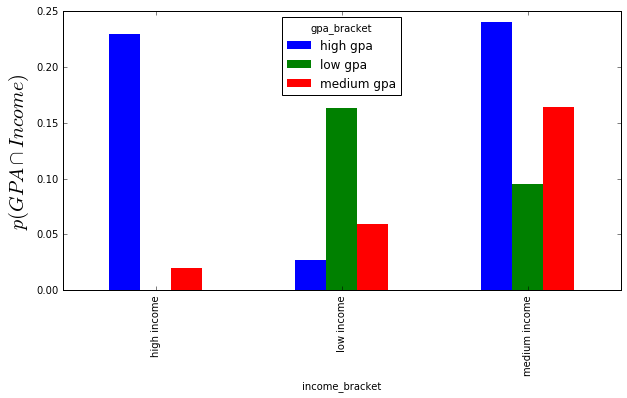

In [30]:
"""Plot the joint probabilities."""

admissions_crstb.plot(kind='bar', edgecolor='None', figsize=(10, 5))
ylabel('$p(GPA \cap Income)$', fontsize=20);


The table above seems to support the notion that family income is a driver of student gpa. If you compare each diagonal element of this matrix versus its adjacent cells, you will notice sizeable discrepancies. In other words, students from high income families are most likely to have high gpas while having relatively low probabilities of earning medium or low gpas.
I was struck by the variance in the diagonal elements: high income - high gpa has a higher joint probability (0.23) than low income - low gpa (0.163) and medium income - medium gpa (0.165).
The bar plot above shows that students from medium-income families are just as likely as students from high-income families to get high gpas, whereas students from low-income families have a very low probability of earning a high gpa. Family income seems to be a gate-keeper for achieving a high gpa at the threshold between low and medium family income. In other words, if a student's family income is beyond the low-income bracket, than their family's income is less of a limiting factor on their potential gpa.

We still need to account for the variance in sample size between each income bracket.
Therefore, we need to calculate the conditional probabilities of each intersection by dividing the the student count at each intersection by the row-sum of each income bracket.

In [31]:
"""Calculate row-sums."""

admissions_counts = pd.crosstab(admissions.income_bracket,admissions.gpa_bracket).apply(lambda x: x, axis=1)

high_income_row_sum = float(admissions_counts[admissions_counts.index=='high income'].sum(axis=1))
medium_income_row_sum = float(admissions_counts[admissions_counts.index=='medium income'].sum(axis=1))
low_income_row_sum = float(admissions_counts[admissions_counts.index=='low income'].sum(axis=1))


In [32]:
"""Create conditional probability dataframe by dividing intersection count by the row-sum's 
calculated above."""

admissions_conditional = admissions_counts.copy()

admissions_conditional.ix['high income'] = admissions_conditional.ix['high income'] / high_income_row_sum
admissions_conditional.ix['medium income'] = admissions_conditional.ix['medium income'] / medium_income_row_sum
admissions_conditional.ix['low income'] = admissions_conditional.ix['low income'] / low_income_row_sum

print("Conditional Probabilities")
admissions_conditional

Conditional Probabilities


gpa_bracket,high gpa,low gpa,medium gpa
income_bracket,,,
high income,0.920,0.000,0.080
low income,0.108,0.653,0.238
medium income,0.481,0.190,0.329


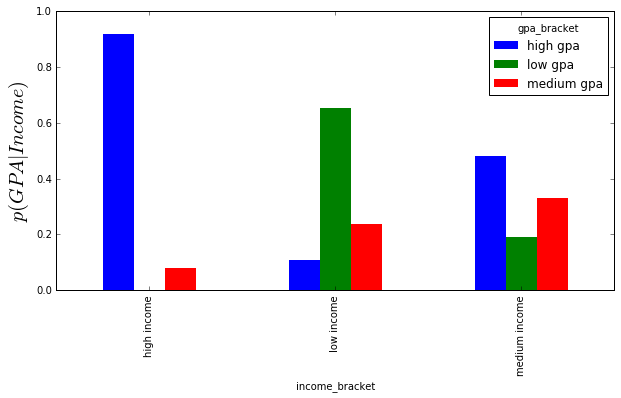

In [33]:
"""Plot the conditional probabilities."""

admissions_conditional.plot(kind='bar', edgecolor='None', figsize=(10, 5))
ylabel('$p(GPA | Income)$', fontsize=20);

After treating each family income bracket equally regardless of the number of observations within each bracket we can conclude:
*Given that a student comes from a high income family, there is a very high probability (0.92) that the student will have a high GPA, while there is a very low probability of the student having a non-high GPA (0.08).
*Given that a student comes from a low-income family, there is also a high probability (0.65) that they will have a low-GPA. Students from low-income families have the lowest likelihood of attaining high GPAs (0.10).
*Students from medium income families are less constrained by income in their likelihood for achieving higher GPAs. However, they do not have the same level of assurance that a student from a high-income family has for attaining a high GPA.